<a href="https://colab.research.google.com/github/ktpanda2025/sta_135_final/blob/main/STA135_Project_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

There may be a chance that the plots probably wont render well here so just copy and paste code into your R instead if you need to

In [ ]:
install.packages("HSAUR2") #Uncomment and recomment as necessary
install.packages("corrplot")
library(HSAUR2)
library(ggplot2)
library(tools)
library(corrplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: tools

corrplot 0.95 loaded



In [ ]:
data(USairpollution)
head(USairpollution)
summary(USairpollution)

,SO2,temp,manu,popul,wind,precip,predays
,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>
Albany,46,47.6,44,116,8.8,33.36,135
Albuquerque,11,56.8,46,244,8.9,7.77,58
Atlanta,24,61.5,368,497,9.1,48.34,115
Baltimore,47,55.0,625,905,9.6,41.31,111
Buffalo,11,47.1,391,463,12.4,36.11,166
Charleston,31,55.2,35,71,6.5,40.75,148


      SO2              temp            manu            popul       
 Min.   :  8.00   Min.   :43.50   Min.   :  35.0   Min.   :  71.0  
 1st Qu.: 13.00   1st Qu.:50.60   1st Qu.: 181.0   1st Qu.: 299.0  
 Median : 26.00   Median :54.60   Median : 347.0   Median : 515.0  
 Mean   : 30.05   Mean   :55.76   Mean   : 463.1   Mean   : 608.6  
 3rd Qu.: 35.00   3rd Qu.:59.30   3rd Qu.: 462.0   3rd Qu.: 717.0  
 Max.   :110.00   Max.   :75.50   Max.   :3344.0   Max.   :3369.0  
      wind            precip         predays     
 Min.   : 6.000   Min.   : 7.05   Min.   : 36.0  
 1st Qu.: 8.700   1st Qu.:30.96   1st Qu.:103.0  
 Median : 9.300   Median :38.74   Median :115.0  
 Mean   : 9.444   Mean   :36.77   Mean   :113.9  
 3rd Qu.:10.600   3rd Qu.:43.11   3rd Qu.:128.0  
 Max.   :12.700   Max.   :59.80   Max.   :166.0  

In [ ]:
cor(USairpollution)


,SO2,temp,manu,popul,wind,precip,predays
SO2,1.00000000,-0.43360020,0.64476873,0.49377958,0.09469045,0.05429434,0.36956363
temp,-0.43360020,1.00000000,-0.19004216,-0.06267813,-0.34973963,0.38625342,-0.43024212
manu,0.64476873,-0.19004216,1.00000000,0.95526935,0.23794683,-0.03241688,0.13182930
popul,0.49377958,-0.06267813,0.95526935,1.00000000,0.21264375,-0.02611873,0.04208319
wind,0.09469045,-0.34973963,0.23794683,0.21264375,1.00000000,-0.01299438,0.16410559
precip,0.05429434,0.38625342,-0.03241688,-0.02611873,-0.01299438,1.00000000,0.49609671
predays,0.36956363,-0.43024212,0.13182930,0.04208319,0.16410559,0.49609671,1.00000000


## **SO2 Chart By City**

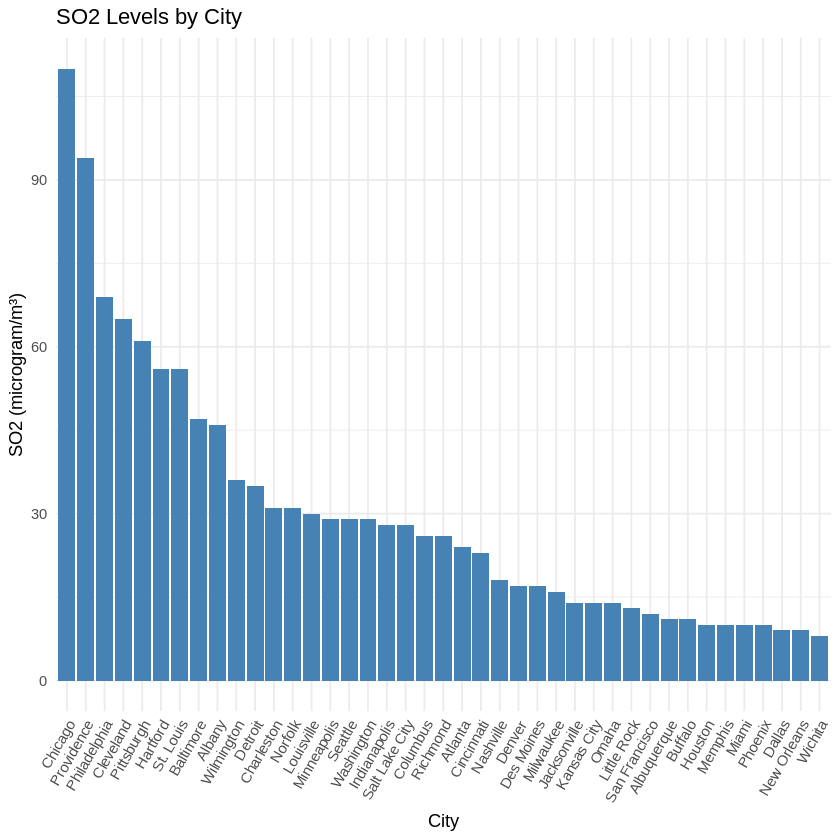

In [ ]:
# SO2 Chart by City

# Convert to data frame and add city names as a column
df <- data.frame(city = rownames(USairpollution), USairpollution)

# Sort by SO2 in descending order
df <- df[order(-df$SO2), ]

# Create bar chart
ggplot(df, aes(x = reorder(city, -SO2), y = SO2)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(title = "SO2 Levels by City",
       x = "City",
       y = "SO2 (microgram/m³)") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 60, hjust = 1))

**Correlation Plot**

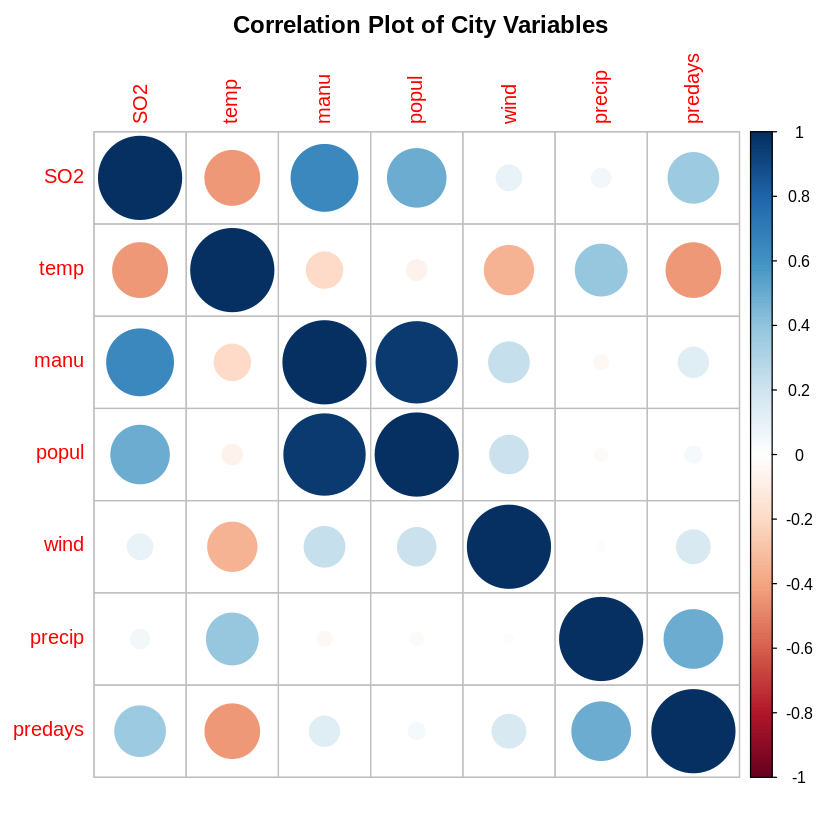

In [ ]:
corrplot(cor(USairpollution), title = "Correlation Plot of City Variables",  mar = c(2,0,2,0))


**Histograms**

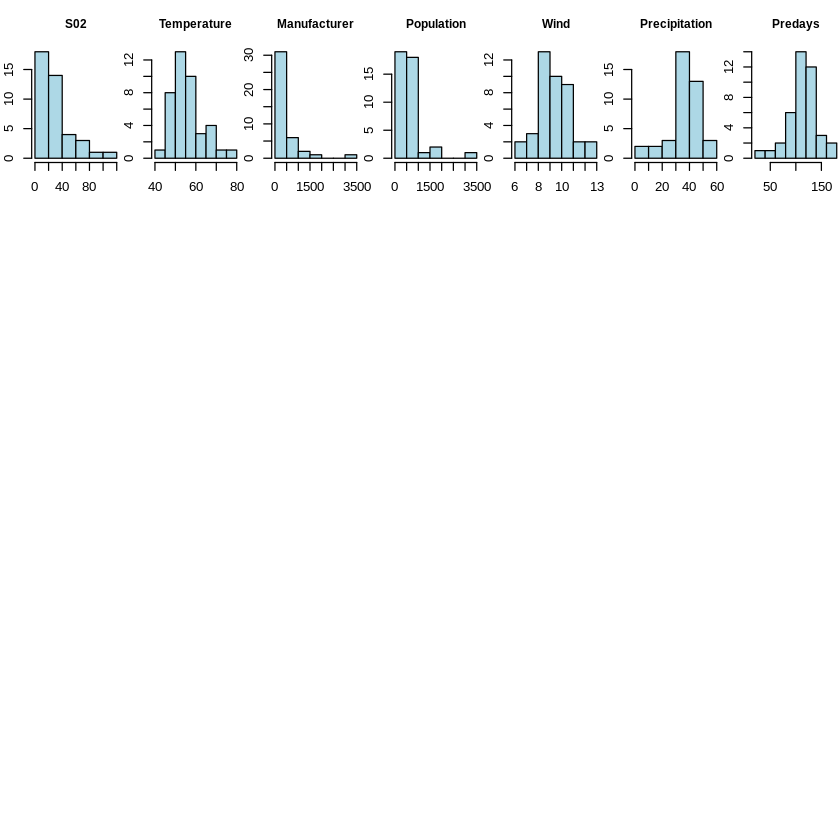

In [ ]:
par(mfrow = c(4,7), mar = c(3, 2, 3, 0))
hist(USairpollution$SO2, main = "S02", xlab = "", col = "light blue", cex.main = 0.9)
hist(USairpollution$temp, main = "Temperature", col = "light blue", cex.main = 0.9)
hist(USairpollution$manu, main = "Manufacturer", col = "light blue", cex.main = 0.9)
hist(USairpollution$popul, main = "Population", col = "light blue", cex.main = 0.9)
hist(USairpollution$wind, main = "Wind", col = "light blue", cex.main = 0.9)
hist(USairpollution$precip, main = "Precipitation", col = "light blue", cex.main = 0.9)
hist(USairpollution$predays, main = "Predays", col = "light blue", cex.main = 0.9)

## **PCA Codes Here**


In [ ]:
str(USairpollution)

'data.frame':	41 obs. of  7 variables:
 $ SO2    : int  46 11 24 47 11 31 110 23 65 26 ...
 $ temp   : num  47.6 56.8 61.5 55 47.1 55.2 50.6 54 49.7 51.5 ...
 $ manu   : int  44 46 368 625 391 35 3344 462 1007 266 ...
 $ popul  : int  116 244 497 905 463 71 3369 453 751 540 ...
 $ wind   : num  8.8 8.9 9.1 9.6 12.4 6.5 10.4 7.1 10.9 8.6 ...
 $ precip : num  33.36 7.77 48.34 41.31 36.11 ...
 $ predays: int  135 58 115 111 166 148 122 132 155 134 ...


# **PrComp Code**

In [ ]:
S = cor(USairpollution)

In [ ]:
data <- USairpollution
pca_result <- prcomp(data, center = TRUE, scale. = TRUE)
summary <- summary(pca_result)
summary

Importance of components:
                          PC1    PC2    PC3    PC4     PC5     PC6     PC7
Standard deviation     1.6517 1.2298 1.1811 0.9445 0.58888 0.31668 0.15973
Proportion of Variance 0.3897 0.2160 0.1993 0.1274 0.04954 0.01433 0.00364
Cumulative Proportion  0.3897 0.6058 0.8051 0.9325 0.98203 0.99636 1.00000

In [ ]:
cum_prop <- summary$importance["Cumulative Proportion", ]
pcs <- c(1:length(cum_prop))
pcs_df <- data.frame(cum_prop,pcs)

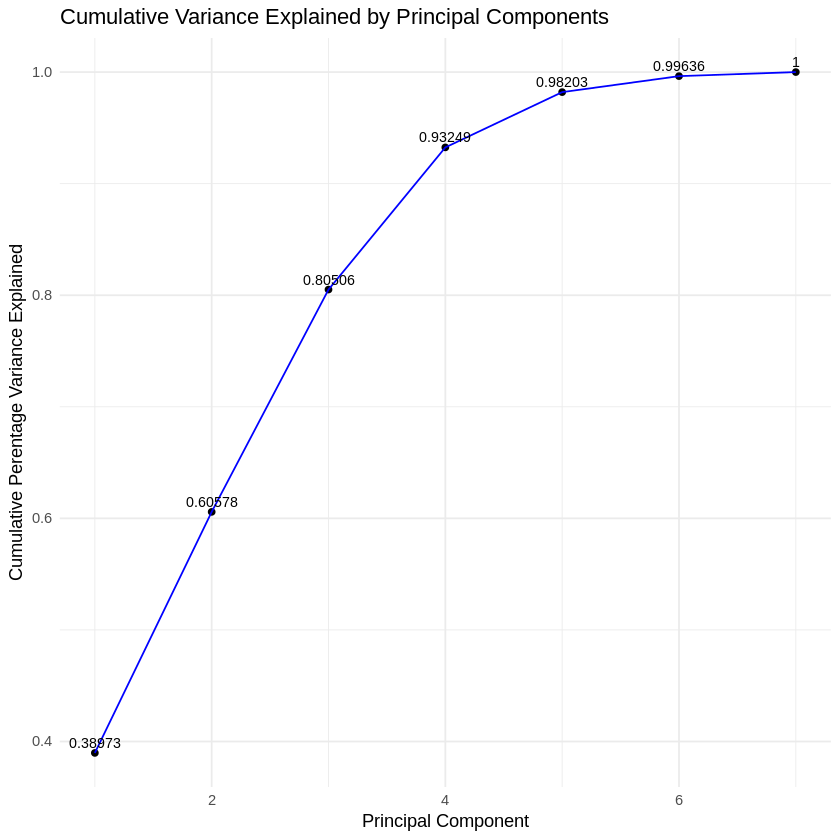

In [ ]:
ggplot(pcs_df, aes(x = pcs, y = cum_prop)) +
  geom_point() +
  geom_line(group = 1, color = "blue")+
   geom_text(label = cum_prop,size = 3,vjust = -0.5)+
   labs(
    title = "Cumulative Variance Explained by Principal Components",
    x = "Principal Component",
    y = "Cumulative Perentage Variance Explained"
  ) +
  theme_minimal()

Biplot & Corrplot

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
SO2,-0.4896988171,-0.08457563,-0.0143502,0.40421007,-0.7303942,-0.18334573,-0.149529278
temp,0.3153706901,0.08863789,-0.6771362,-0.18522794,-0.1624652,-0.61066107,0.023664113
manu,-0.5411687028,0.22588109,-0.2671591,-0.02627237,0.1641011,0.04273352,0.745180920
popul,-0.4875881115,0.28200380,-0.3448380,-0.11340377,0.3491048,0.08786327,-0.649125507
wind,-0.2498749284,-0.05547149,0.3112655,-0.86190131,-0.2682549,-0.15005378,-0.015765377
precip,-0.0001873122,-0.62587937,-0.4920363,-0.18393719,-0.1605988,0.55357384,0.010315309
predays,-0.2601790729,-0.67796741,0.1095789,0.10976070,0.4399698,-0.50494668,-0.008217393


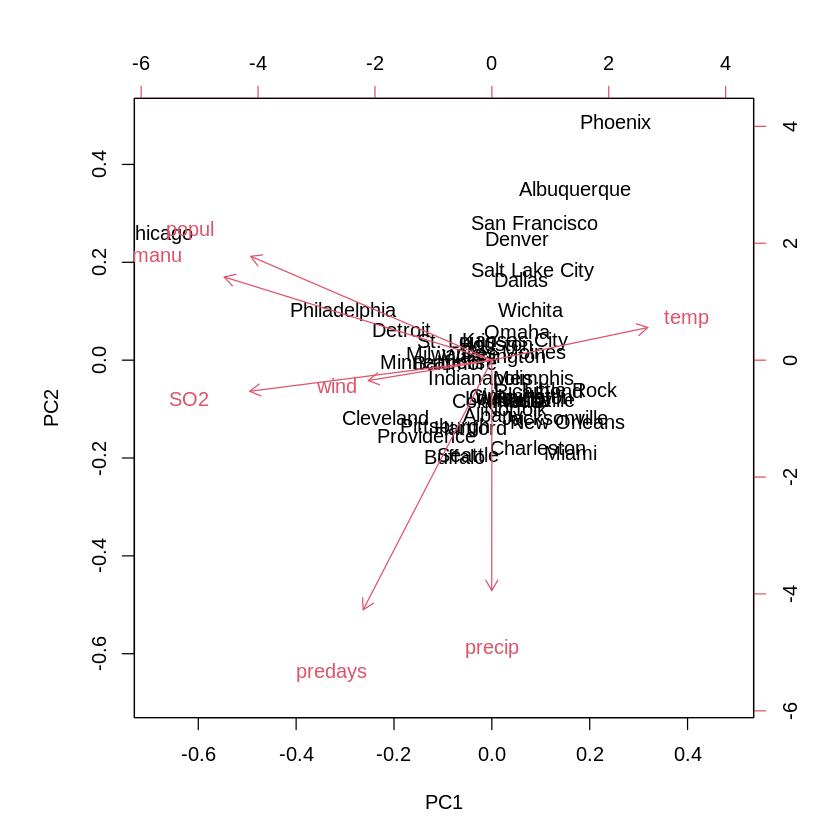

Importance of components:
                          PC1    PC2    PC3    PC4     PC5     PC6     PC7
Standard deviation     1.6517 1.2298 1.1811 0.9445 0.58888 0.31668 0.15973
Proportion of Variance 0.3897 0.2160 0.1993 0.1274 0.04954 0.01433 0.00364
Cumulative Proportion  0.3897 0.6058 0.8051 0.9325 0.98203 0.99636 1.00000

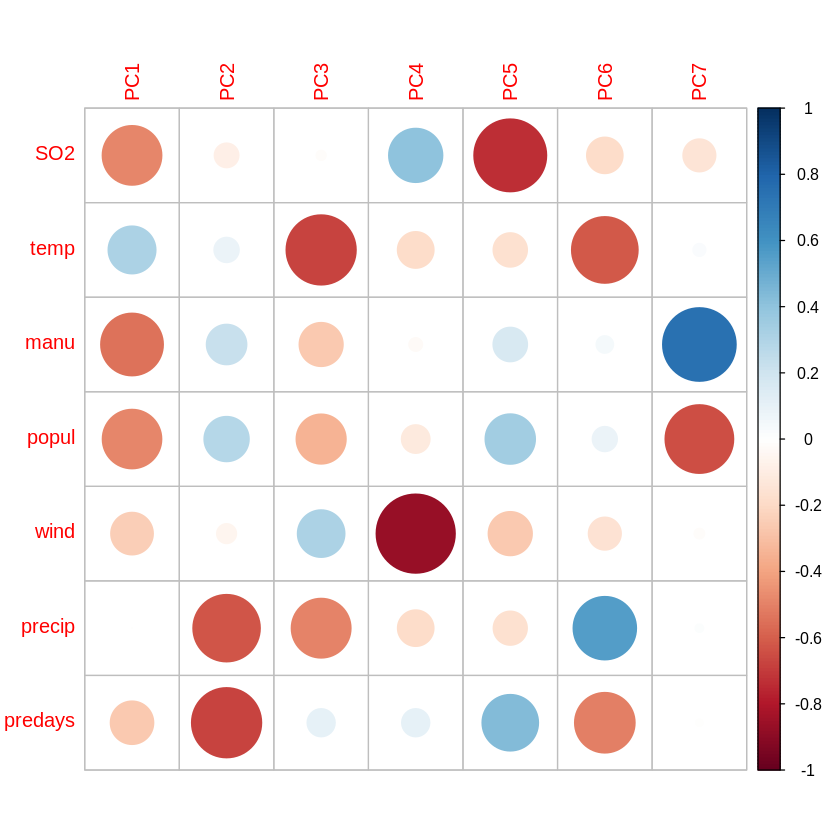

In [ ]:
biplot(pca_result)

pca_result$rotation
corrplot(pca_result$rotation)

summary(pca_result)

Ranks Setup?

In [ ]:
scores = pca_result$x # Data multipled by loading matrix (Loading Factor)

scores

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
Albany,0.03386467,-0.89884070,1.33650241,1.12900208,-0.21426964,-0.0359952177,-0.132848853
Albuquerque,1.79452779,2.72940259,1.19191751,0.28602300,-0.20196419,-0.2673906852,-0.020247458
Atlanta,0.61099829,-0.63025982,-0.97623533,-0.19367061,-0.11077248,0.0977790639,0.070248563
Baltimore,-0.79088751,-0.03447144,-0.35988922,0.06874038,-0.42393250,0.2417802363,-0.225440697
Buffalo,-0.81715797,-1.54968000,1.83115448,-1.63152284,0.99738457,-0.4807397860,0.111501301
Charleston,0.99951059,-1.41323028,-0.09154032,2.01110316,0.59873734,-0.2270028528,0.053955710
Chicago,-7.23097079,2.02725781,-2.23562114,0.32738216,0.11789908,0.0848270571,0.174480698
Cincinnati,0.43446500,-0.56506889,-0.26808843,1.40786154,0.87437541,0.1885787133,0.234346264
Cleveland,-2.29405867,-0.92604347,0.76552946,0.02354852,-0.27403255,-0.7173722920,0.286817655
Columbus,0.09582927,-0.64420752,0.42534857,0.65074591,0.61182243,0.0835903648,-0.168625335


In [ ]:
weight = summary(pca_result)$importance[1, 1:4] #The first row were the eigenvalues

ranks  =  scores[, 1] * weight[1] + scores[, 2] * weight[2] + scores[, 3] * weight[3] + scores[, 4] * weight[4]

sorted = as.data.frame(sort(ranks))

In [ ]:
head(sorted)
tail(sorted)

,sort(ranks)
,<dbl>
Chicago,-11.781620
Philadelphia,-5.746893
Cleveland,-4.001523
Houston,-3.581200
Miami,-2.822311
Detroit,-2.635541


,sort(ranks)
,<dbl>
Omaha,2.022994
San Francisco,4.606293
Denver,5.119935
Salt Lake City,5.804175
Albuquerque,7.998460
Phoenix,9.357345


In [ ]:
sorted

,sort(ranks)
,<dbl>
Chicago,-11.7816202
Philadelphia,-5.7468931
Cleveland,-4.0015227
Houston,-3.5811998
Miami,-2.8223107
Detroit,-2.6355412
Buffalo,-2.6335906
Providence,-2.2491732
Baltimore,-1.7088419
